In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#fping -D -l -p 100 google.com >> gg.ping
#fping -D -l -p 100 facebook.com >> fb.ping

In [147]:
typ = "fb"

if typ is "fb":
    path = "fb.ping"
elif typ is "gg":
    path = "gg.ping"

times = []
x = []

with open(path) as fid:
    lines = fid.readlines()
    for line in lines:
        if "]" in line:
            index0 = line.index("[")+1
            index1 = line.index("]")
            timestamp = line[index0:index1]
            times.append(float(timestamp))
            
            line = line[index1+1:]
            
            index2 = line.index("[") + 1
            index3 = line.index("]")
            number = line[index2:index3]
            x.append(int(number))

x = np.array(x)
times = np.array(times)            
times = times - times[0]



In [148]:
expected = (times[len(times) - 1] - times[0]) * 10 / bin_qtd

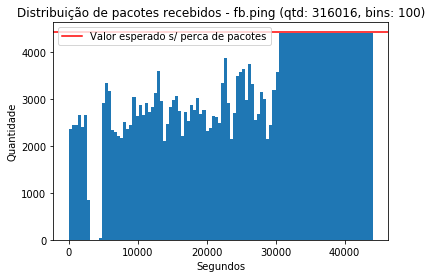

In [152]:
bin_qtd = 100
plt.hist(times, bins=bin_qtd)
plt.axhline(expected, color='r', label="Valor esperado s/ perca de pacotes")
plt.title("Distribuição de pacotes recebidos - %s (qtd: %s, bins: %s)" % (path, len(x), bin_qtd))
plt.legend()
plt.xlabel("Segundos")
plt.ylabel("Quantidade")
plt.show()